In [1]:
%matplotlib inline

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np
import operator
try:
    assert reduce
except NameError:
    import functools
    reduce = functools.reduce

SQRT3OVER2 = math.sqrt(3) / 2.


class DirichletDistribution(object):
    def __init__(self, *alphas):
        self.alphas = alphas
        assert len(alphas) > 2

    def pdf(self, values):
        # From http://stackoverflow.com/questions/10658866/calculating-pdf-of-dirichlet-distribution-in-python
        return (math.gamma(sum(self.alphas)) /
                reduce(
                    operator.mul,
                    [math.gamma(a) for a in self.alphas]
                ) * reduce(
                    operator.mul,
                    [values[i]**(self.alphas[i]-1.0) for i in range(len(self.alphas))]
                )
        )

    def random_sample(self, size=1000):
        return np.random.dirichlet(self.alphas, size=size)


class TriangularDirichletGrapher(object):
    def __init__(self, dt):
        self.dt = dt
        assert isinstance(dt, DirichletDistribution)
        assert len(self.dt.alphas) == 3

    def project_3d_point_to_2d(self, a, b, c):
        x = 0.5 * (2 * b + c)
        y = SQRT3OVER2 * c
        return x, y

    def find_closest_point(self, x, y):
        return int(round(x * 100)) / 100., int(round(y * 100)) / 100.

    def fill_in_Z(self):
        for i, a in enumerate(np.arange(0, 1, 0.001)):
            for j, b in enumerate(np.arange(0, 1, 0.001)):
                c = 1 - a - b
                if c < 0:
                    continue
                else:
                    x, y = self.find_closest_point(*self.project_3d_point_to_2d(a, b, c))
                    self.Z[int(x * 99), int(y * 99)] = self.dt.pdf((a, b, c))

        self.Z[self.Z < 1e-6] = 0

    def plot_hexbin(self):
        values = self.dt.random_sample(size=100000)
        xs, ys = self.project_3d_point_to_2d(None, values[:,1], values[:,2])
        fig = plt.figure(figsize=(12,9))
        plt.hexbin(xs, ys, cmap=cm.gist_stern_r, gridsize=25)
        plt.colorbar()
        return fig.gca()

    def plot_surface(self, steps=100, view=(50, 30)):
        self.X = np.linspace(0, 1, steps)
        self.Y = np.linspace(0, 1, steps)
        self.Z = np.zeros((steps, steps))
        self.fill_in_Z()
        self.X, self.Y = np.meshgrid(self.X, self.Y)
        fig = plt.figure(figsize=(12,9))
        ax = fig.gca(projection='3d')
        ax.plot_surface(
            self.X[::-1, ::-1],
            self.Y,
            self.Z,
            rstride=1,
            cstride=1,
            cmap=cm.cubehelix_r,
            linewidth=0,
            antialiased=True
        )
        ax.view_init(*view)
        return ax

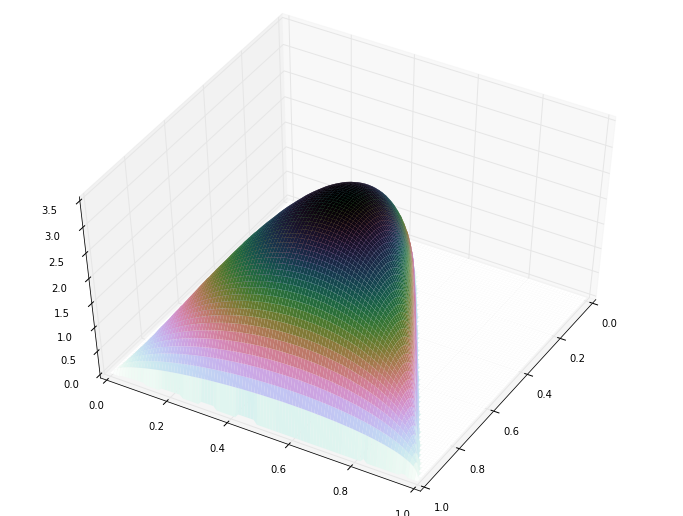

In [22]:
TriangularDirichletGrapher(DirichletDistribution(1.4, 1.6, 1.7)).plot_surface()

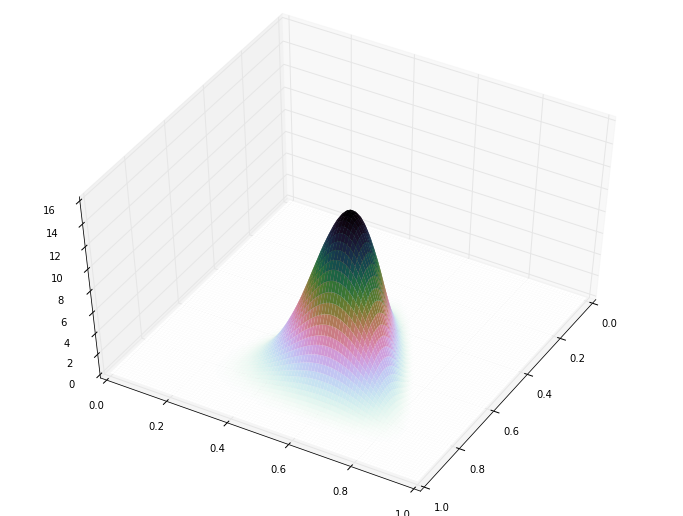

In [3]:
TriangularDirichletGrapher(DirichletDistribution(4,6,7)).plot_surface()

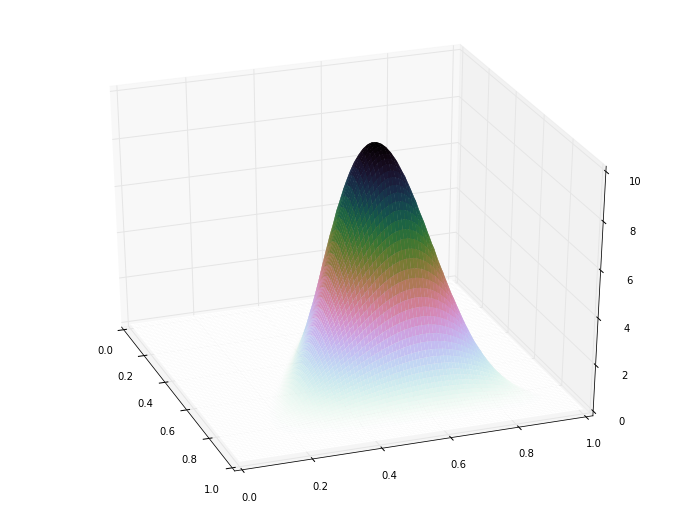

In [17]:
TriangularDirichletGrapher(DirichletDistribution(2, 3, 5)).plot_surface(view=(30, -20))

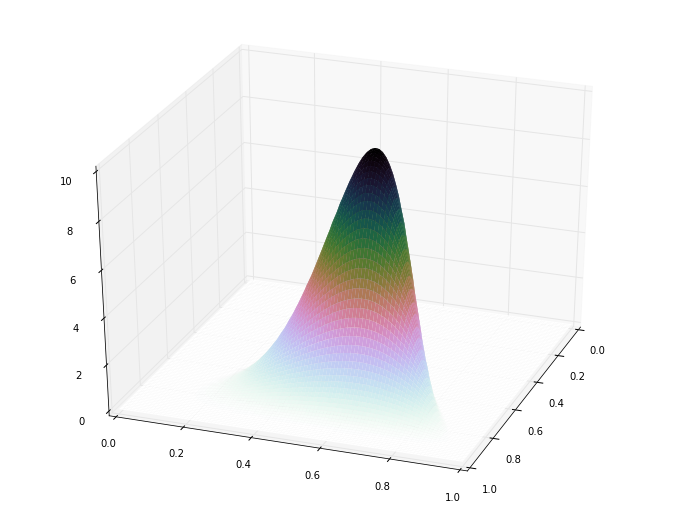

In [18]:
TriangularDirichletGrapher(DirichletDistribution(2, 3, 5)).plot_surface(view=(30, 20))

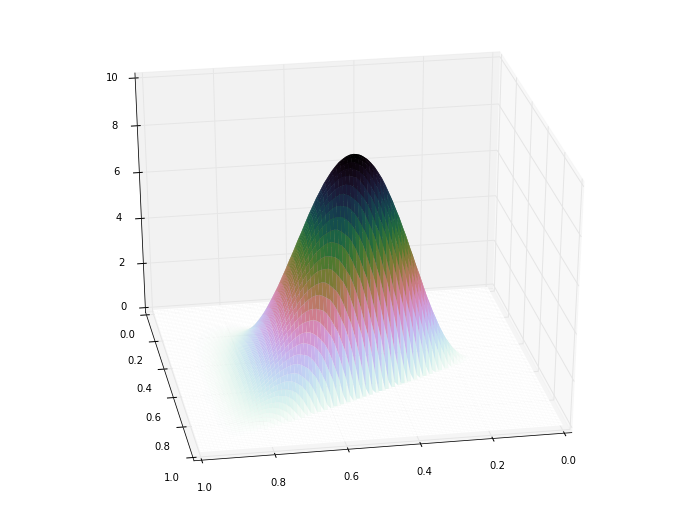

In [19]:
TriangularDirichletGrapher(DirichletDistribution(2, 3, 5)).plot_surface(view=(30, 80))

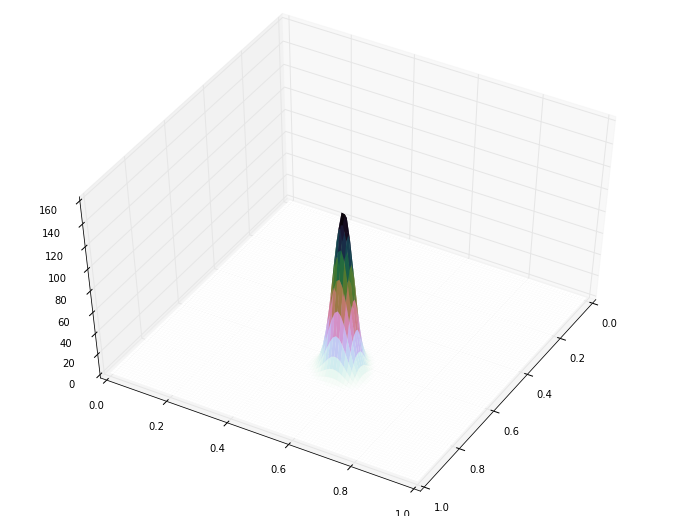

In [20]:
TriangularDirichletGrapher(DirichletDistribution(40,60,70)).plot_surface()

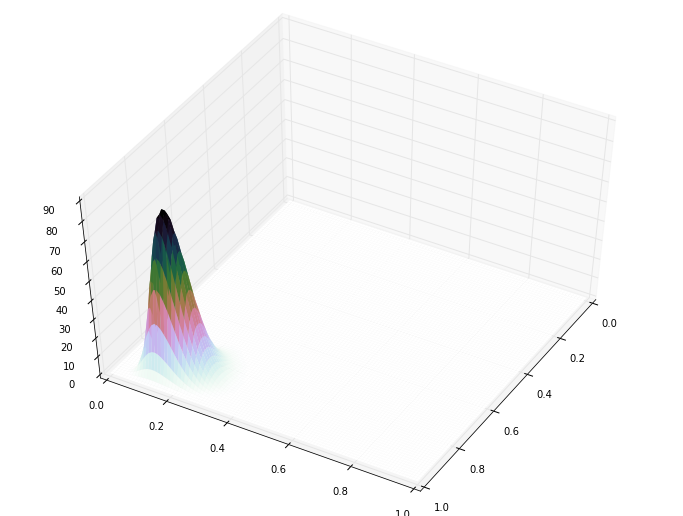

In [4]:
TriangularDirichletGrapher(DirichletDistribution(40,6,7)).plot_surface()

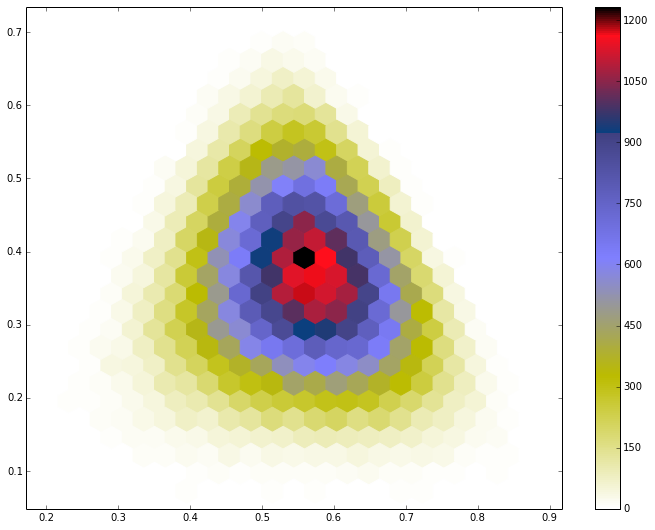

In [16]:
TriangularDirichletGrapher(DirichletDistribution(4,6,7)).plot_hexbin()

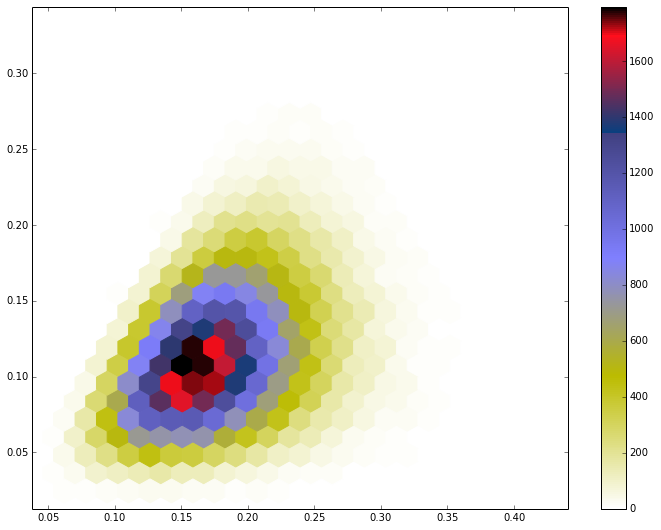

In [17]:
TriangularDirichletGrapher(DirichletDistribution(40,6,7)).plot_hexbin()

In [19]:
math.gamma?

In [1]:
import numpy as np
import math

SQRT3OVER2 = math.sqrt(3) / 2.

def project_point(a, b, c):
    x = 0.5 * (2 * b + c)
    y = SQRT3OVER2 * c
    return x, y

In [2]:
def plot_dirichlet(alphas):
    clf()
    assert len(alphas) == 3
    values = np.random.dirichlet(alphas, size=200000)
    xs, ys = project_point(None, values[:,1], values[:,2])
    hexbin(xs, ys, cmap=cm.gist_stern_r, gridsize=25)
    colorbar()

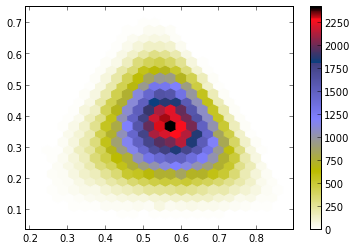

In [3]:
plot_dirichlet((4, 6, 7))
savefig("dirichlet-sampling-1.png", dpi=600)

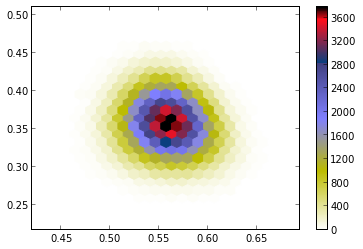

In [4]:
plot_dirichlet((40, 60, 70))
savefig("dirichlet-sampling-2.png", dpi=600)

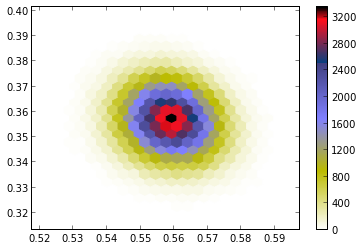

In [5]:
plot_dirichlet((400, 600, 700))
savefig("dirichlet-sampling-3.png", dpi=600)

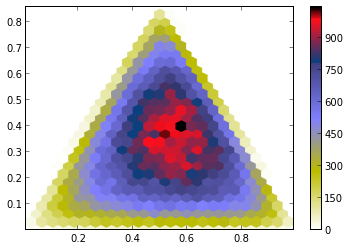

In [6]:
plot_dirichlet((1.4, 1.6, 1.7))
savefig("dirichlet-sampling-4.png", dpi=600)

We can also plot the PDF, using a simple function:

In [3]:
import math
import operator

def dirichlet_pdf(x, alpha):
  return (math.gamma(sum(alpha)) / 
          reduce(operator.mul, [math.gamma(a) for a in alpha]) *
          reduce(operator.mul, [x[i]**(alpha[i]-1.0) for i in range(len(alpha))]))

In [4]:
dirichlet_pdf([0.2, 0.2, 0.6], (1.4, 1.6, 1.7))

2.9963703550531244

In [5]:
def find_closest_point(x, y):
    return int(round(x * 100)) / 100., int(round(y * 100)) / 100.

In [18]:
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
Z = np.zeros((100, 100))

ALPHAS = (4, 6, 7)

for i, a in enumerate(np.arange(0, 1, 0.001)):
    for j, b in enumerate(np.arange(0, 1, 0.001)):
        c = 1 - a - b
        if c < 0:
            continue
        else:
            x, y = find_closest_point(*project_point(a, b, c))
            Z[int(x * 99), int(y * 99)] = dirichlet_pdf((a, b, c), ALPHAS)

In [19]:
Z[Z < 1e-6] = 0

In [14]:
Z[40:50, 40:50]

array([[  2.91696943,   2.70088943,   2.5206918 ,   2.2848015 ,
          2.09196474,   1.80603033,   1.61828851,   1.39699574,
          1.18869594,   0.99527024],
       [  3.56241034,   3.32697513,   3.12814773,   2.86361384,
          2.6446134 ,   2.37050741,   2.09627491,   1.83471796,
          1.58497115,   1.34987294],
       [  4.27424776,   4.02156496,   3.80534269,   3.51330877,
          3.26847091,   2.95861364,   2.64522645,   2.34227114,
          2.04933884,   1.77050967],
       [  5.04538124,   4.77776918,   4.54552036,   4.22750995,
          3.88584502,   3.61242691,   3.2603018 ,   2.91549326,
          2.57837024,   2.30633005],
       [  5.86620307,   5.5860265 ,   5.33911125,   4.99688145,
          4.62563493,   4.24985938,   3.9333695 ,   3.54685401,
          3.16521473,   2.85321875],
       [  6.72468979,   6.43418943,   6.17381473,   5.8091984 ,
          5.41049163,   5.00175637,   4.65302723,   4.22544871,
          3.79956425,   3.44694615],
       [  

In [21]:
X, Y = np.meshgrid(X, Y)

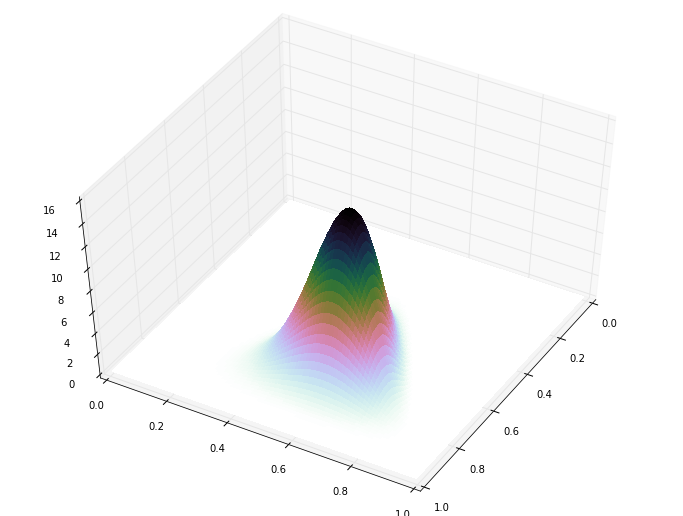

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax.plot_surface(X[::-1, ::-1], Y, Z, rstride=1, cstride=1, cmap=cm.cubehelix_r,
        linewidth=0, antialiased=False)
ax.view_init(50, 30)

In [11]:
int(round(0.61 * 100))

61